In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
def sin(x, T=100):
  return np.sin(2.0, np.pi * x / T)
  
def noise_sin(T=100, ampl=0.05):
  x = np.arange(0, 2 * T + 1)
  noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
  return sin(x) + noise

In [0]:
T = 100
f = noise_sin(T)

In [0]:
def make_dataset(low_data, n_prev=100):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target

In [0]:
#g:学習データ，h:学習ラベル
g, h = make_dataset(f)

In [0]:
# モデル構築

# 1つの学習データのStep数(今回は25)
length_of_sequence = g.shape[1] 
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(g, h,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Train on 158 samples, validate on 18 samples
Epoch 1/100
158/158 [==============================] - 2s 10ms/step - loss: 0.8253 - val_loss: 0.5418
Epoch 2/100
158/158 [==============================] - 0s 610us/step - loss: 0.5517 - val_loss: 0.2895
Epoch 3/100
158/158 [==============================] - 0s 595us/step - loss: 0.2944 - val_loss: 0.0810
Epoch 4/100
158/158 [==============================] - 0s 669us/step - loss: 0.0820 - val_loss: 0.0093
Epoch 5/100
158/158 [==============================] - 0s 572us/step - loss: 0.0100 - val_loss: 0.1613
Epoch 6/100
158/158 [==============================] - 0s 639us/step - loss: 0.1666 - val_loss: 0.0513
Epoch 7/100
158/158 [==============================] - 0s 600us/step - loss: 0.0535 - val_loss: 0.0013
Epoch 8/100
158/158 [==============================] - 0s 636us/step - loss: 0.0016 - val_loss: 0.0125
Epoch 9/100
158/158 [==============================] - 0s 598us/step - loss: 0.0125 - val_loss: 0.0348
Epoch 10/100
158/158 [=======

Epoch 32/100
158/158 [==============================] - 0s 589us/step - loss: 0.0055 - val_loss: 0.0037
Epoch 33/100
158/158 [==============================] - 0s 616us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 34/100
158/158 [==============================] - 0s 573us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 35/100
158/158 [==============================] - 0s 661us/step - loss: 0.0012 - val_loss: 6.8562e-04
Epoch 36/100
158/158 [==============================] - 0s 624us/step - loss: 9.0714e-04 - val_loss: 0.0011
Epoch 37/100
158/158 [==============================] - 0s 697us/step - loss: 0.0013 - val_loss: 0.0019
Epoch 38/100
158/158 [==============================] - 0s 620us/step - loss: 0.0022 - val_loss: 0.0026
Epoch 39/100
158/158 [==============================] - 0s 587us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 40/100
158/158 [==============================] - 0s 670us/step - loss: 0.0032 - val_loss: 0.0025
Epoch 41/100
158/158 [==============================] - 

In [0]:
# 予測
predicted = model.predict(g)

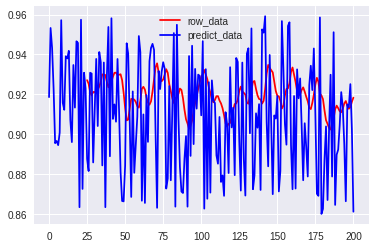

In [16]:
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="row_data")
plt.plot(range(0, len(f)), f, color="b", label="predict_data")
plt.legend()
plt.show()

In [17]:
# 1つの学習データの時間の長さ -> 25
time_length = future_test.shape[1]
# 未来の予測データを保存していく変数
future_result = np.empty((1))

# 未来予想
for step2 in range(400):

    test_data = np.reshape(future_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)

    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result = np.append(future_result, batch_predict)


# sin波をプロット
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.plot(range(0+len(f), len(future_result)+len(f)), future_result, color="g", label="future_predict")
plt.legend()
plt.show()

NameError: ignored